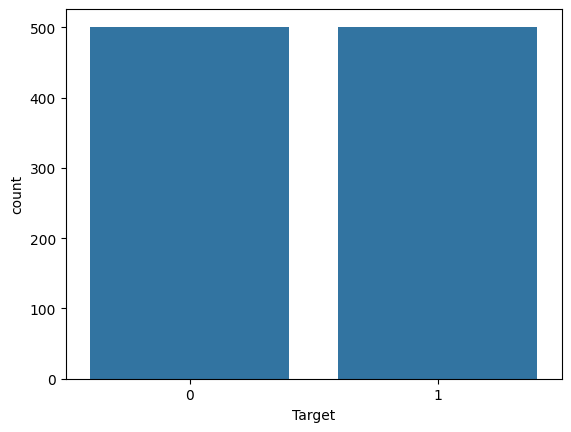

Accuracy is: 100.0
Sensitivity :  1.0
Specificity :  1.0


In [5]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC  # Import SVM
import pickle

data = pd.read_csv('data.csv')
data.head()
data.shape
X = data.iloc[:, :-1]
X.head()
y = data.iloc[:, -1]
y.head()
data['Target'].value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
sns.countplot(x='Target', data=data)
plt.show()
X_train.shape
X_train.head()
y_test.shape
y_test.head()
from sklearn.metrics import accuracy_score
max_accuracy = 0

# Replace KNN with SVM here
model = SVC(kernel='linear', C=1.0)  # You can choose the appropriate kernel and hyperparameters
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
filename = 'svm.sav'
pickle.dump(model, open(filename, 'wb'))
acc = (metrics.accuracy_score(y_pred, y_test) * 100)
print("Accuracy is:", acc)
cm1 = metrics.confusion_matrix(y_pred, y_test)

total1 = sum(sum(cm1))

sensitivity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
print('Sensitivity : ', sensitivity1)

specificity1 = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
print('Specificity : ', specificity1)





In [6]:
import pickle

import pickle
import urllib.request
import json
from time import sleep
while True:
  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  x=int(data['feeds'][0]['entry_id'])
  y=x
  conn.close()
  while x==y:
    conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
    response = conn.read()
    #print ("http status code=%s" % (conn.getcode()))
    data=json.loads(response)
    y=int(data['feeds'][0]['entry_id'])
    conn.close()

  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/1013258/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  i=float(data['feeds'][0]['field2'])


  filename = 'svm.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  person_reports = [[i]]
  predicted = loaded_model.predict(person_reports)
  print(predicted)
  if int(predicted)==0:
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=16I4KHP9BXOUK1I7&field1=Normal")
    response = conn.read()
  else:
    conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=16I4KHP9BXOUK1I7&field1=Theft")
    response = conn.read()




http status code=200
http status code=200
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-6-afed5967d01a>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(predicted)==0:


http status code=200
http status code=200
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-6-afed5967d01a>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(predicted)==0:


http status code=200
http status code=200
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-6-afed5967d01a>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(predicted)==0:


http status code=200


KeyboardInterrupt: 